# Assignment 6: explore and analyze time series

##### ByeongKyu Park(byeonggyu.park)

# 1. Load into dataframe(s)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dictionary for CSV file paths
stock_files = {symbol: f"{symbol}.csv" for symbol in ["AAPL", "GOOG", "MSFT"]}
stock_data = {symbol: pd.read_csv(stock_files[symbol]) for symbol in stock_files}

In [3]:
# Display initial data from each stock
for symbol, frame in stock_data.items():
    print(f"Initial data from {symbol}:")
    print(frame.head(), "\n")

Initial data from AAPL:
         Date      Open      High       Low     Close  Adj Close      Volume
0  2007-01-03  3.081786  3.092143  2.925000  2.992857   2.569716  1238319600
1  2007-01-04  3.001786  3.069643  2.993571  3.059286   2.626753   847260400
2  2007-01-05  3.063214  3.078571  3.014286  3.037500   2.608047   834741600
3  2007-01-08  3.070000  3.090357  3.045714  3.052500   2.620926   797106800
4  2007-01-09  3.087500  3.320714  3.041071  3.306071   2.838647  3349298400 

Initial data from GOOG:
         Date        Open        High         Low       Close   Adj Close  \
0  2007-01-03  232.129913  237.440018  229.694046  232.921951  232.921951   
1  2007-01-04  233.624313  241.071411  233.300537  240.727692  240.727692   
2  2007-01-05  240.349106  242.839783  238.162308  242.685349  242.685349   
3  2007-01-08  242.934418  244.020355  240.199677  240.887100  240.887100   
4  2007-01-09  241.818604  243.213379  239.701538  241.843506  241.843506   

     Volume  
0  15470772

In [4]:
# Convert 'Date' to datetime and set as index
for symbol, frame in stock_data.items():
    frame['Date'] = pd.to_datetime(frame['Date'])
    frame.set_index('Date', inplace=True)

## 1. Plotting open prices for stocks
### Decorate the plots/figure, use various options, not only plain defaults

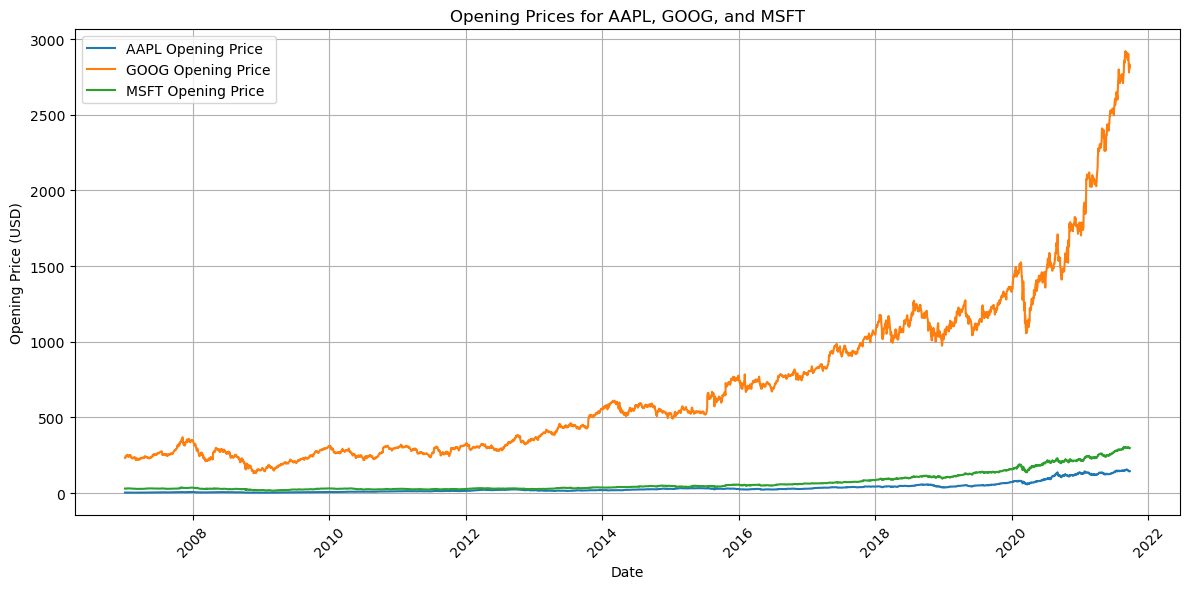

In [5]:
plt.figure(figsize=(12, 6))

for symbol, frame in stock_data.items():
    plt.plot(frame['Open'], label=f"{symbol} Opening Price")

# Configuring plot details
plt.title("Opening Prices for AAPL, GOOG, and MSFT")
plt.xlabel("Date")
plt.ylabel("Opening Price (USD)")
plt.legend()
plt.grid(visible=True)

# Adjusting date labels
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()

### Compare them and describe your comparison with statements

### 1.Trend
- **All Stocks**: Each stock shows an upward trend, but the nature of growth varies.
  - **GOOG** grows rapidly in distinct phases.
  - **AAPL & MSFT** have more consistent and steady growth.

### 2.Price and Market Confidence
- **GOOG** stands out with consistently higher prices than **AAPL** and **MSFT**, signaling stronger market confidence in GOOG.

### 3.Volatility and Stability
- **GOOG** is more volatile, offering high gains but with greater risk.
- **AAPL** and **MSFT** are comparatively less volatile, indicating more stability in their stock values.

### 4.Historical Performance
- Initially, **AAPL** and **MSFT** shared similar growth trends.
- Over time, **MSFT** began to outperform **AAPL**, showing a shift in their relative growth dynamics.

### 5.Investment
- **GOOG**: Best suited for investors seeking rapid growth and willing to accept higher volatility.
- **AAPL & MSFT**: More appropriate for investors favoring long-term, steady growth with less risk.


### Which one to buy? When? Why?

Around 2015, half of the investment funds were likely used to buy Microsoft (MSFT) stocks, chosen for their steady growth. The intention was to hold these stocks long term, unless there was a major downturn.
Google (GOOG) stocks were probably purchased between late 2014 and 2015, due to their rising trend, but sold in mid to late 2018 during a downturn, with the proceeds reinvested in MSFT. At the time, GOOG was considered riskier due to its volatility.
Looking back now, it might seem that staying invested in GOOG, even during downturns, would have been better. However, at the time, without this future insight and only relying on available data, the decision to sell GOOG was based on its perceived higher risk of sharp declines.


# 2. Pick 2018 as a year and MSFT as a stock
## Display one figure with low, high and calculated mean prices:

In [6]:
# Selecting 2018 data for Microsoft
msft_data_2018 = stock_data['MSFT'].loc['2018'].copy()

# Average price calculation
msft_data_2018['Average'] = (msft_data_2018['High'] + msft_data_2018['Low']) / 2

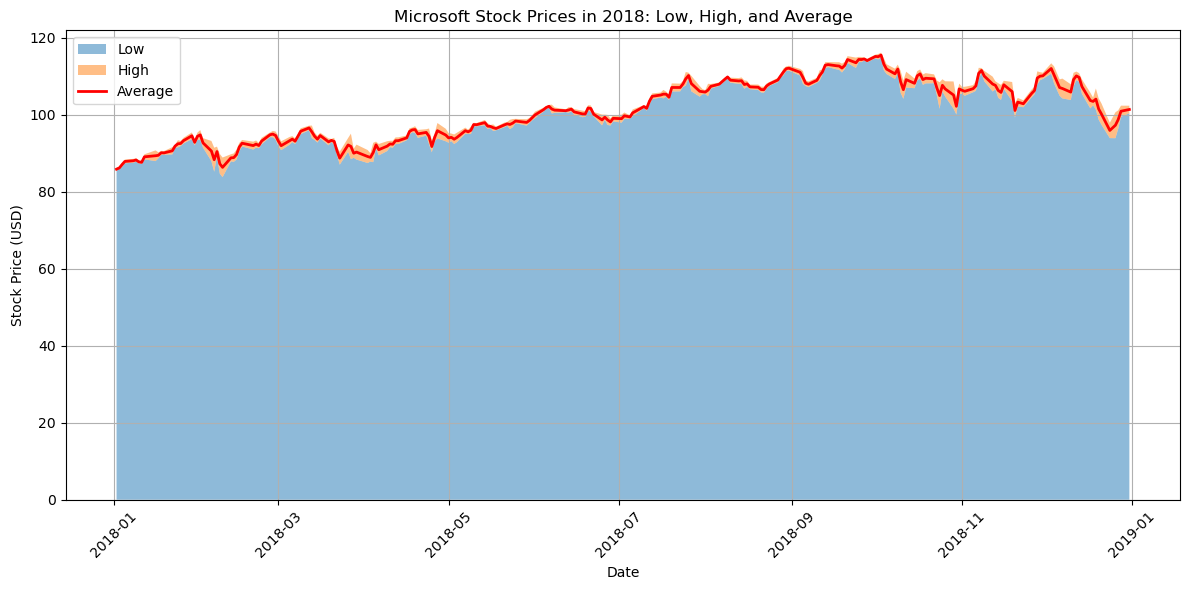

In [7]:
# Plotting Microsoft's 2018 prices
plt.figure(figsize=(12, 6))

# Stack plot for low and high prices
plt.stackplot(msft_data_2018.index, msft_data_2018['Low'], msft_data_2018['High'] - msft_data_2018['Low'],
              labels=['Low', 'High'], alpha=0.5)

# Line plot for average price
plt.plot(msft_data_2018.index, msft_data_2018['Average'], label='Average', color='red', linewidth=2)

# Plot details
plt.title("Microsoft Stock Prices in 2018: Low, High, and Average")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(visible=True)

# Date label adjustment
plt.xticks(rotation=45)
plt.tight_layout()

# Display plot
plt.show()

The stack plot shows the range between the lowest and highest prices, highlighting the stock's volatility.
The mean price is shown as a red line, averaging the daily highs and lows.
Wider gaps between the high and low prices suggest more volatility.
The mean price trend follows the highs and lows, providing a smoothed summary of the stock's performance.


# 3. Plot rolling window means of all 3 stocks (‘Open’ prices) in one figure

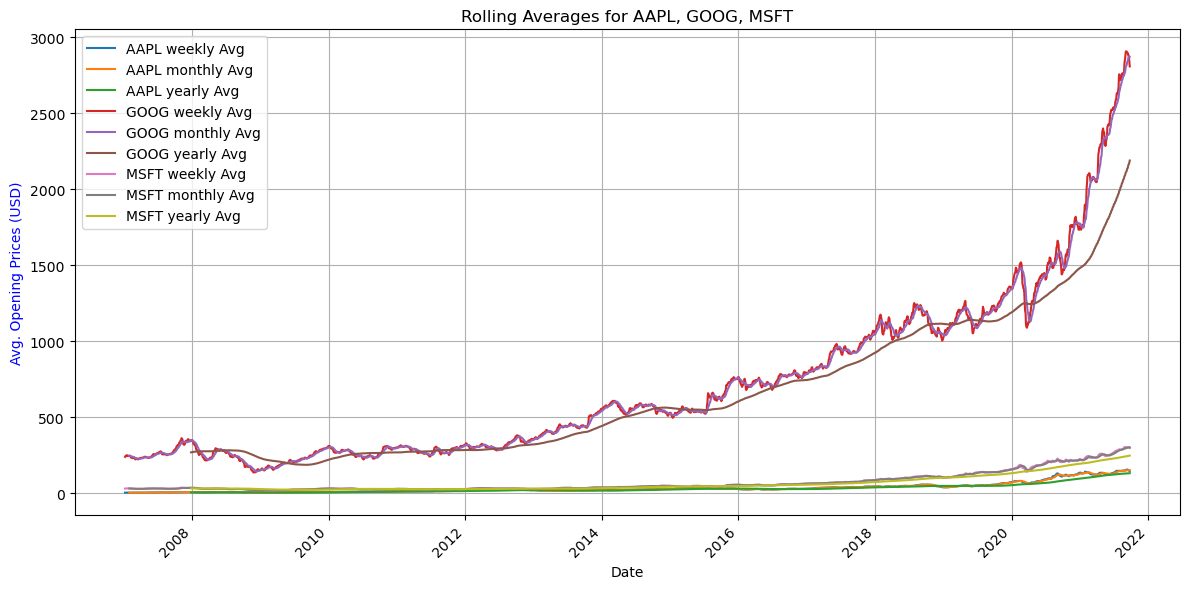

In [8]:
# Rolling window sizes: weekly, monthly, yearly
rolling_windows = {'weekly': 5, 'monthly': 21, 'yearly': 250}

plt.figure(figsize=(12, 6))

for symbol, frame in stock_data.items():
    for window_label, days in rolling_windows.items():
        frame['Open'].rolling(window=days).mean().plot(label=f"{symbol} {window_label} Avg")

# Enhancing plot aesthetics
plt.title("Rolling Averages for AAPL, GOOG, MSFT")
plt.xlabel("Date")
plt.ylabel("Avg. Opening Prices (USD)", color="blue")
plt.legend()
plt.grid(visible=True)

# Date label adjustment
plt.xticks(rotation=45)
plt.tight_layout()

# Display plot
plt.show()

## Comparison

### Weekly Average
  - Indicates short-term trends and daily price fluctuations.
  - Googles show high volatility, while Apple & Microsoft are more stable.
  - Useful for short-term trading strategies.

### Monthly Average
  - Smoothens out daily variations, revealing medium-term trends.
  - Apple and Microsoft show a gradual increase; Google's growth is more pronounced.

### Yearly Average
  - Provides a comprehensive overview, minimizing short-term fluctuations.
  - All three stocks display an upward trend.
  - Microsoft shows the greatest growth.

### Investment
  - Ideal for growth-oriented investors seeking some stability.
  - Best observed in the yearly average; suitable for medium to long-term investments.
- **Google**:
  - Strong upward trajectory, particularly evident in longer-term averages.
  - Attractive for long-term investors comfortable with some volatility.
- **Apple & Microsoft**:
  - Steady growth with minimal fluctuations.
  - Appeals to cautious investors; reliable for long-term investment.
  - Over time, Microsoft tends to have a higher annual average than Apple

## Which one to buy? When? Why?

Initially, I was inclined to buy Google (GOOG) shares in 2015. But the trends shown in the rolling window graph suggest that a better opportunity would have been on May 15, 2014. On this date, both the weekly and monthly averages dipped, indicating a short-term decrease in stock prices. However, the yearly average continued to rise, implying that the long-term trend was still positive. This pattern hinted that it might be possible to buy the stocks at a lower price before they eventually started to rise again.
In terms of selling, the graph alone pointed to March 22, 2020, as a potential time to sell. Both the weekly and monthly averages were dropping quickly, while the yearly average was barely climbing. This suggested that the stock's growth was slowing down, and it might be a good time to sell before the potential for a more significant decrease.
